In [1]:
%run importFunctions.ipynb

# Load the Togo dataset
togo_df = load_data('C:/Users/KIIT/Desktop/Wind-Solar-Analysis/data/togo-dapaong_qc.csv')

""" Summary Statistics """
print('Summary Statistics for Togo:')
print(summary_statistics(togo_df))

Summary Statistics for Togo:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.20000

In [5]:
""" Data Quality Check """
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
data_quality_check(togo_df, columns_to_check)


There are no missing values.

Incorrect Entries in GHI:
 0        -1.3
1        -1.3
2        -1.3
3        -1.2
4        -1.2
         ... 
525595   -0.8
525596   -0.9
525597   -1.0
525598   -1.1
525599   -1.2
Name: GHI, Length: 257385, dtype: float64
No incorrect entries in DNI.
No incorrect entries in DHI.
No incorrect entries in ModA.
No incorrect entries in ModB.
No incorrect entries in WS.
No incorrect entries in WSgust.

Outliers in GHI:
 4985      1139.0
4995      1112.0
195137    1139.0
195138    1152.0
195139    1155.0
           ...  
510411    1162.0
510412    1285.0
510413    1202.0
510414    1267.0
510416    1214.0
Name: GHI, Length: 1303, dtype: float64

Outliers in DNI:
 674       706.7
675       696.1
707       690.2
708       715.7
710       720.0
          ...  
525071    636.8
525072    634.0
525073    629.2
525074    624.3
525075    618.9
Name: DNI, Length: 50586, dtype: float64

Outliers in DHI:
 559       551.5
560       564.2
561       570.9
562       575.4
563

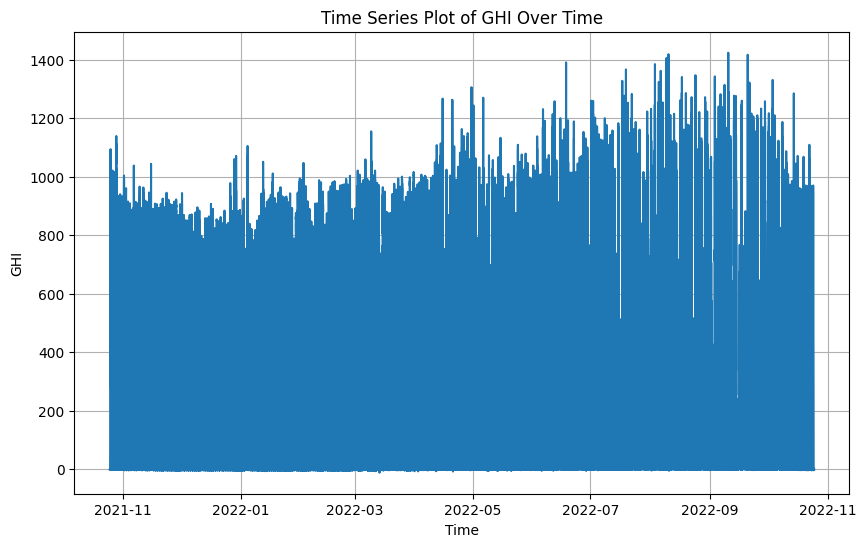

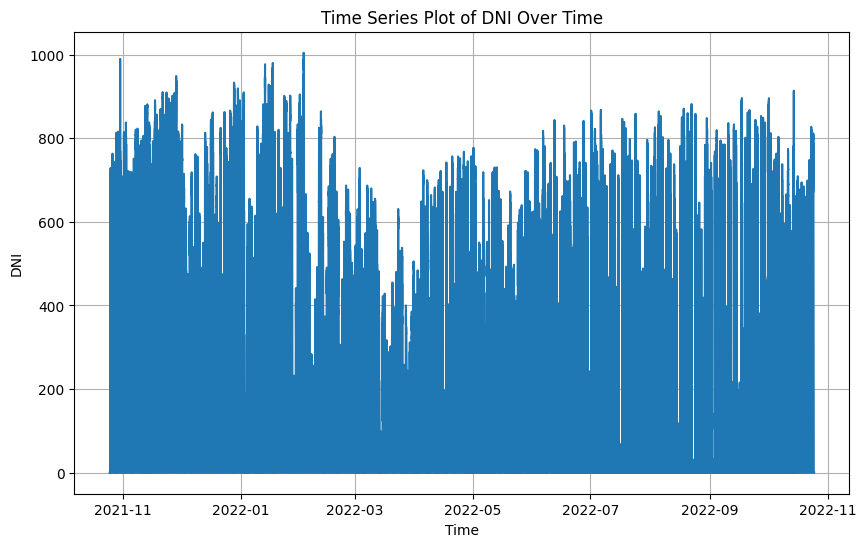

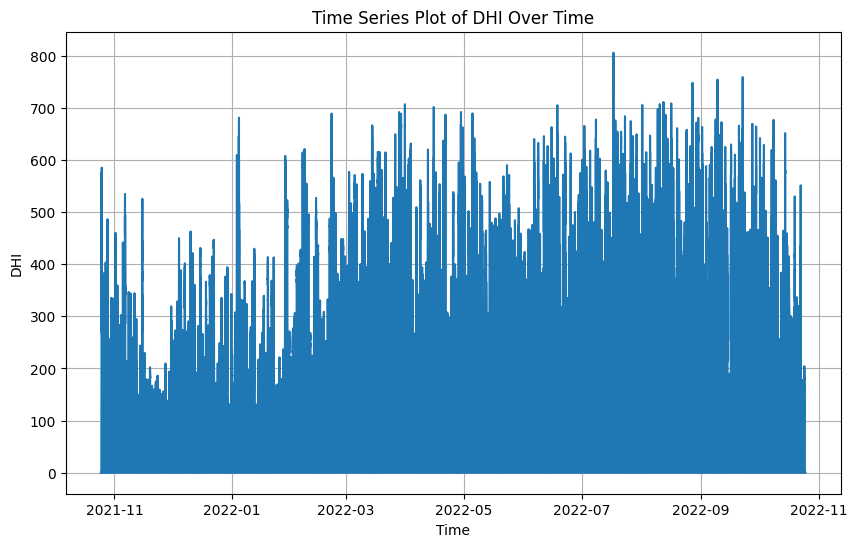

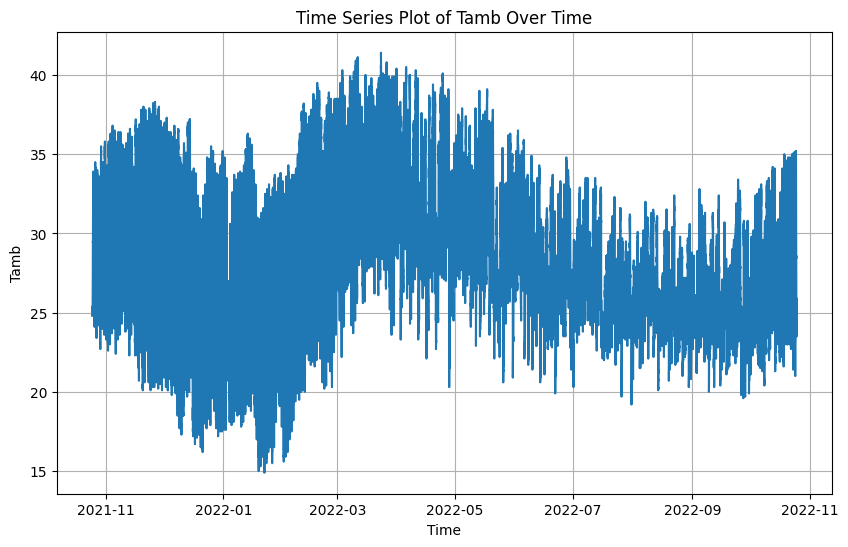

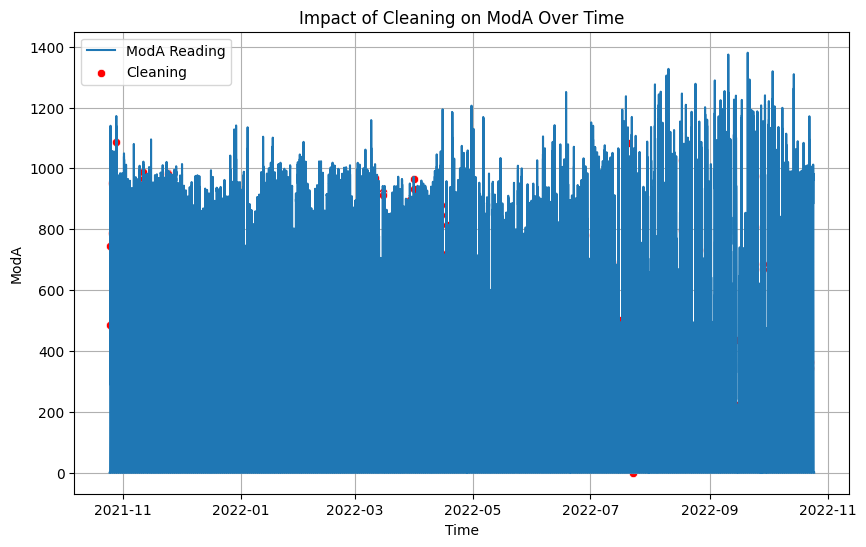

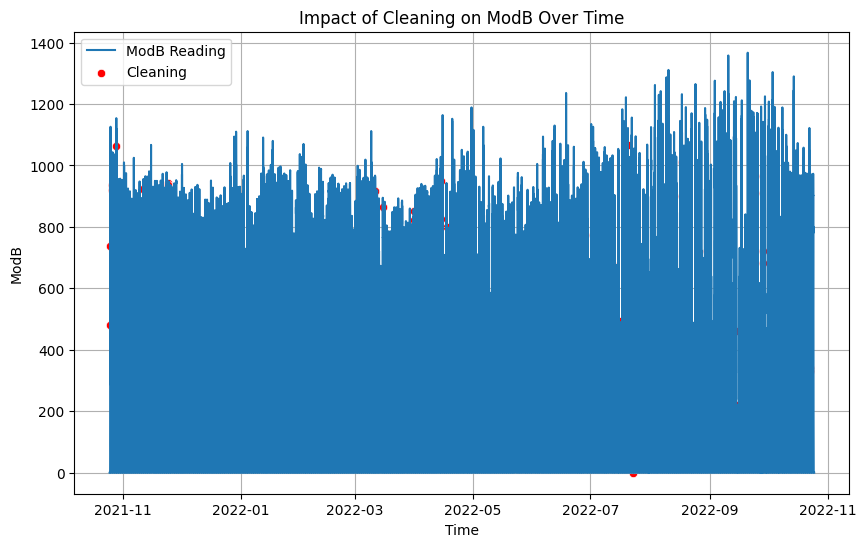

In [4]:
""" Time Series Analysis """

# Plot GHI, DNI, DHI, and Tamb over time for sierraleone dataset
plot_time_series(togo_df, ['GHI', 'DNI', 'DHI', 'Tamb'], date_column='Timestamp')

# Evaluate the impact of cleaning on ModA and ModB for togo dataset
evaluate_cleaning_impact(togo_df, ['ModA', 'ModB'], cleaning_column='Cleaning', date_column='Timestamp')

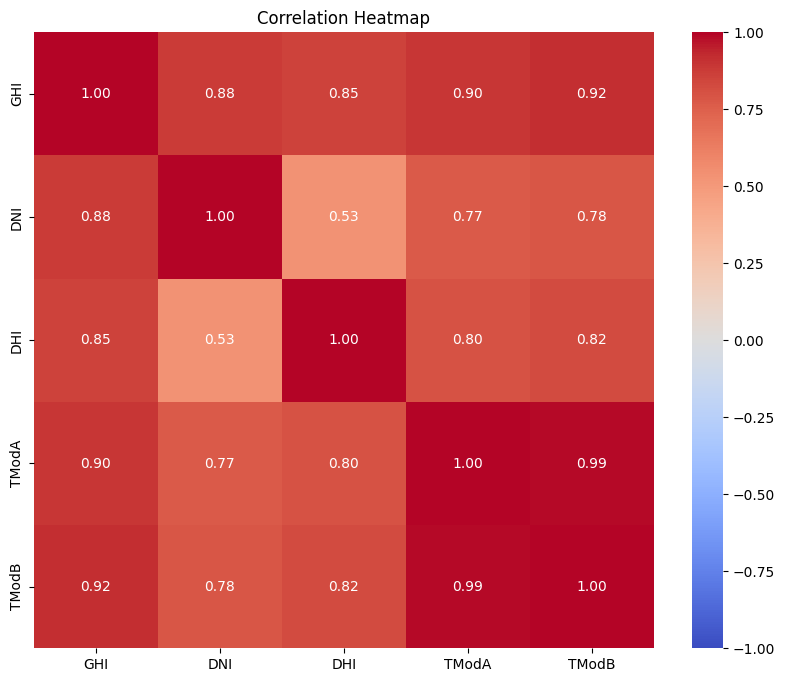

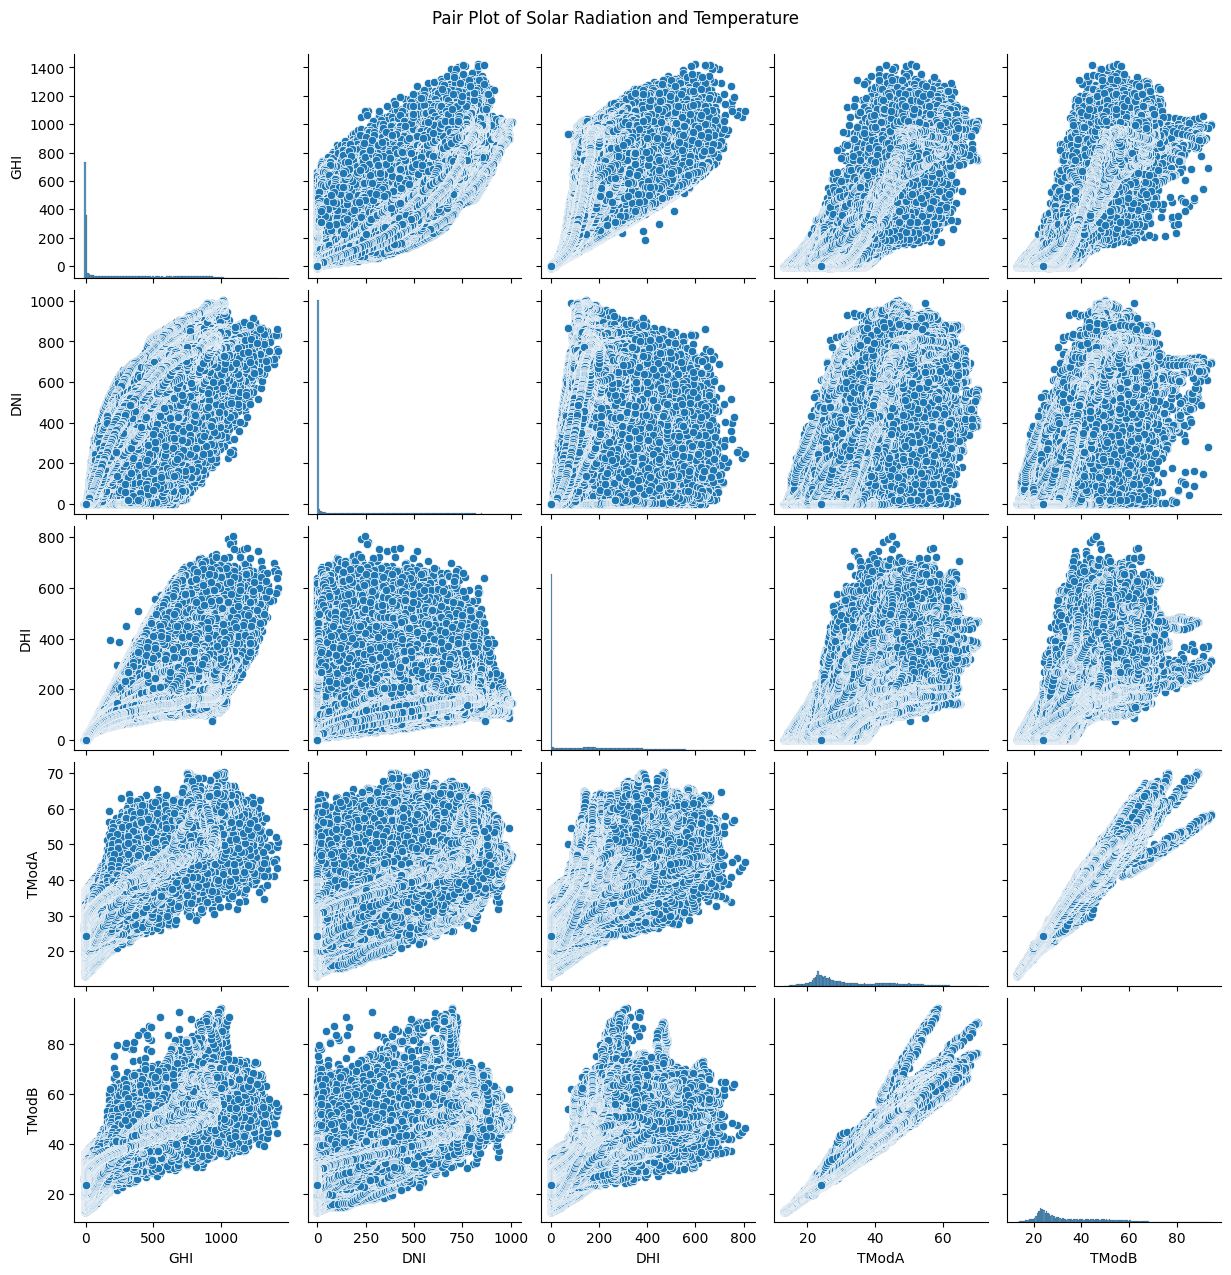

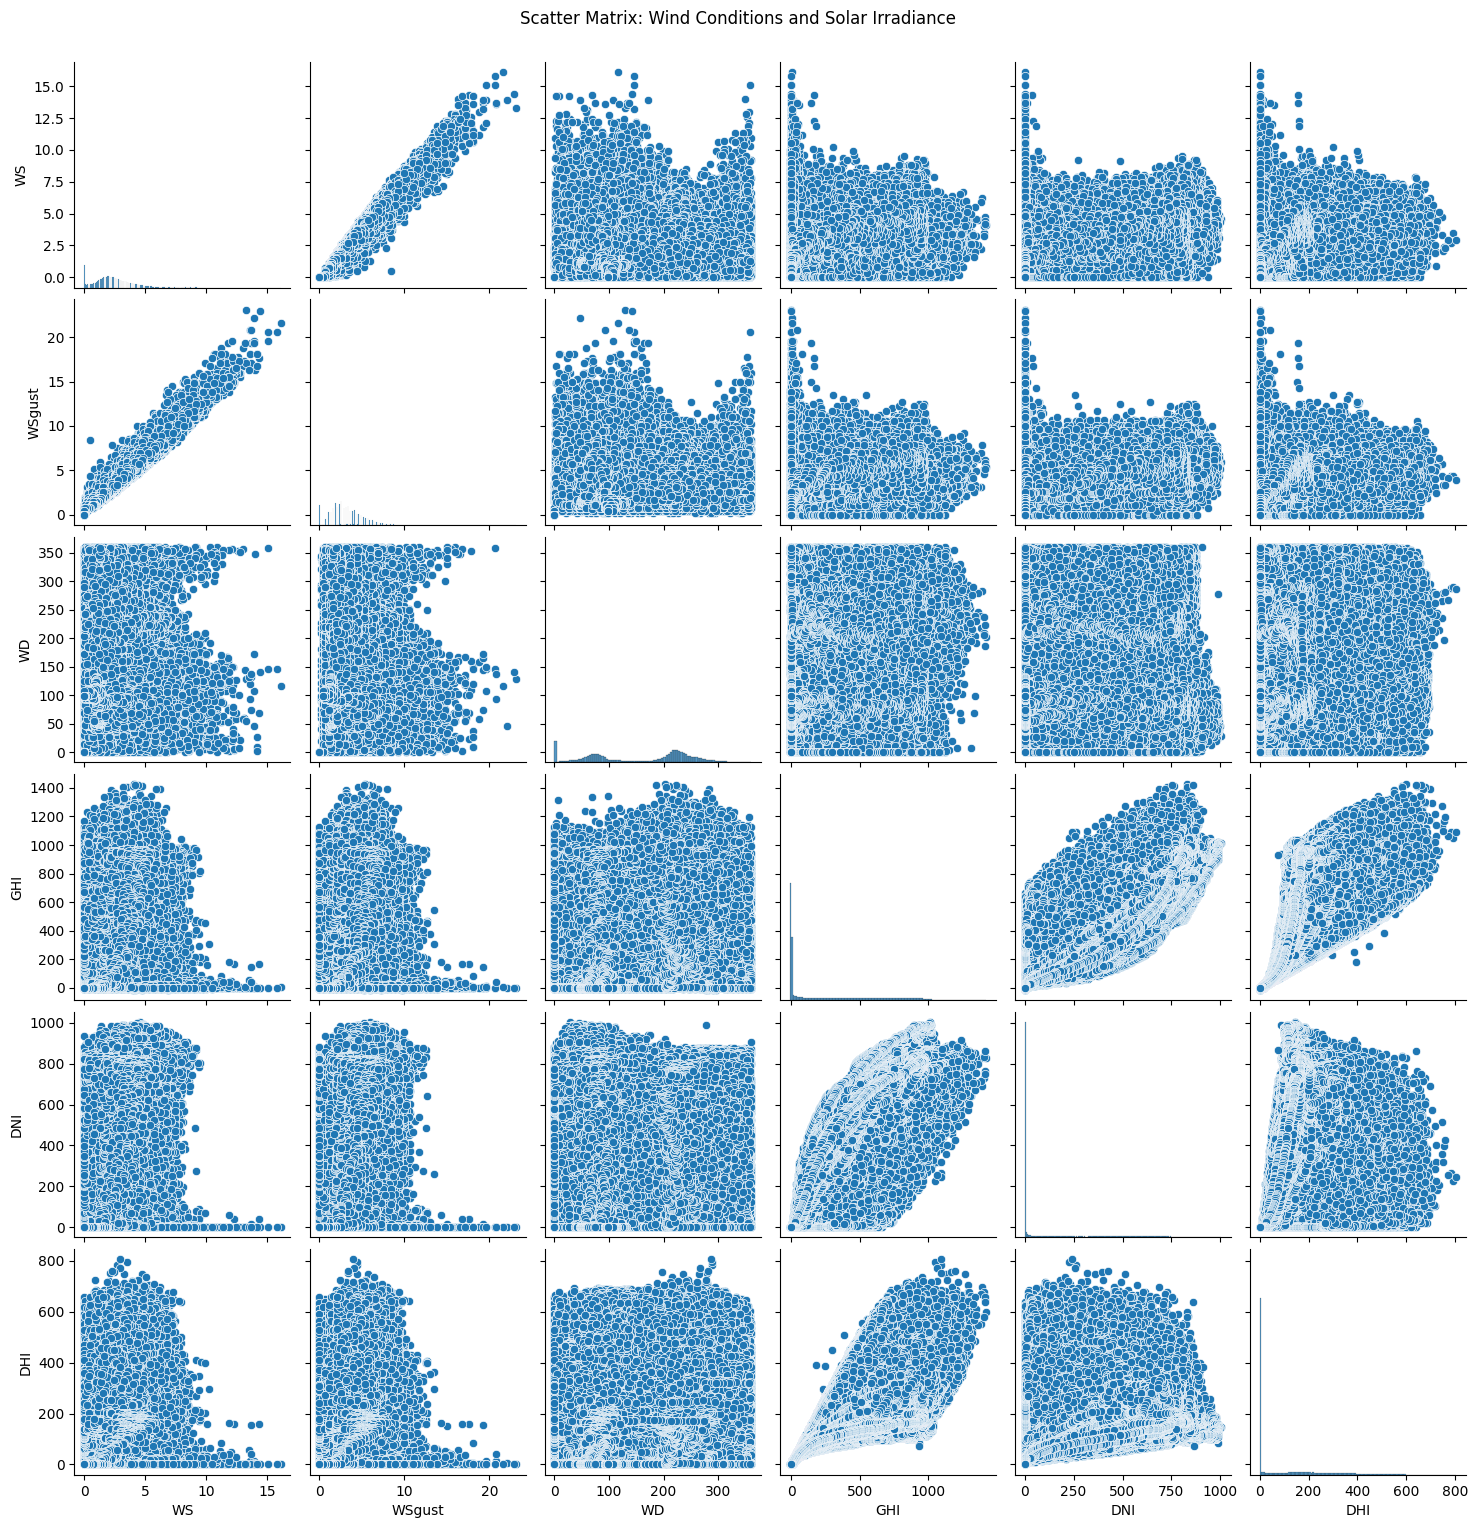

In [3]:
""" Correlation Analysis """

# Define the columns to include in the heatmap
columns_to_include = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plot_correlation_heatmap(togo_df, columns_to_include)

# Use the same columns for the pair plot
plot_pairplot(togo_df, columns_to_include)

# Define the wind-related columns
wind_columns = ['WS', 'WSgust', 'WD']
# Combine with irradiance columns for the scatter matrix
plot_wind_scatter_matrix(togo_df, wind_columns, ['GHI', 'DNI', 'DHI'])

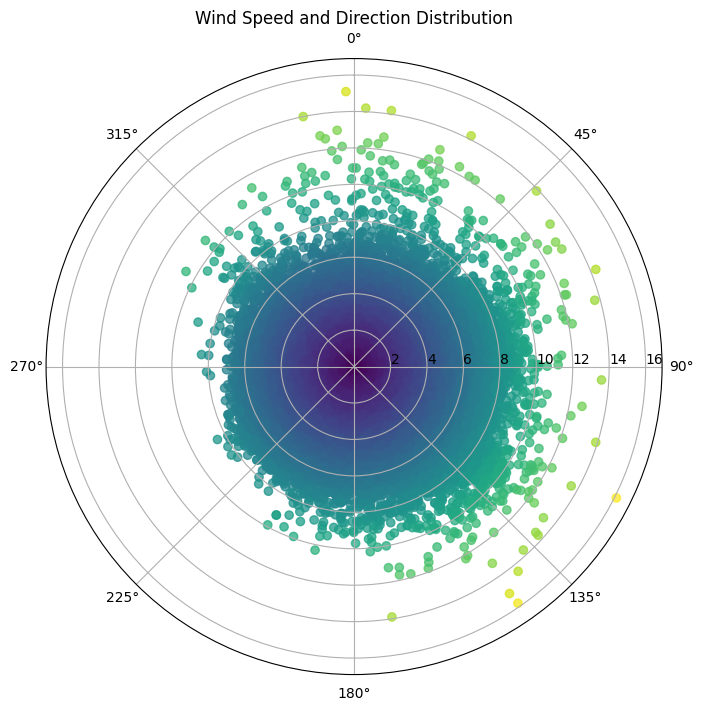

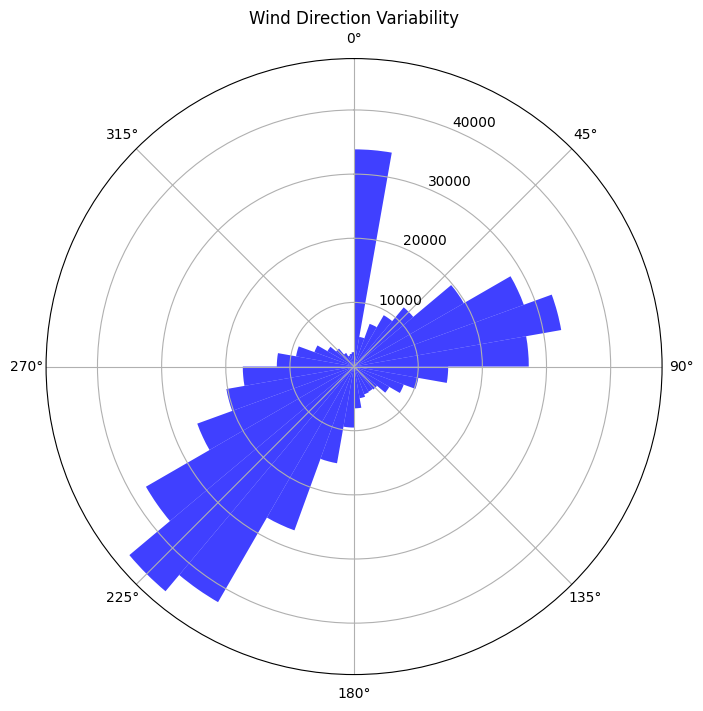

In [2]:
""" Wind Analysis """

# Call the function with your dataset
plot_wind_polar(togo_df, 'WS', 'WD')


# Call the function with your dataset
plot_wind_direction_variability(togo_df, 'WD')

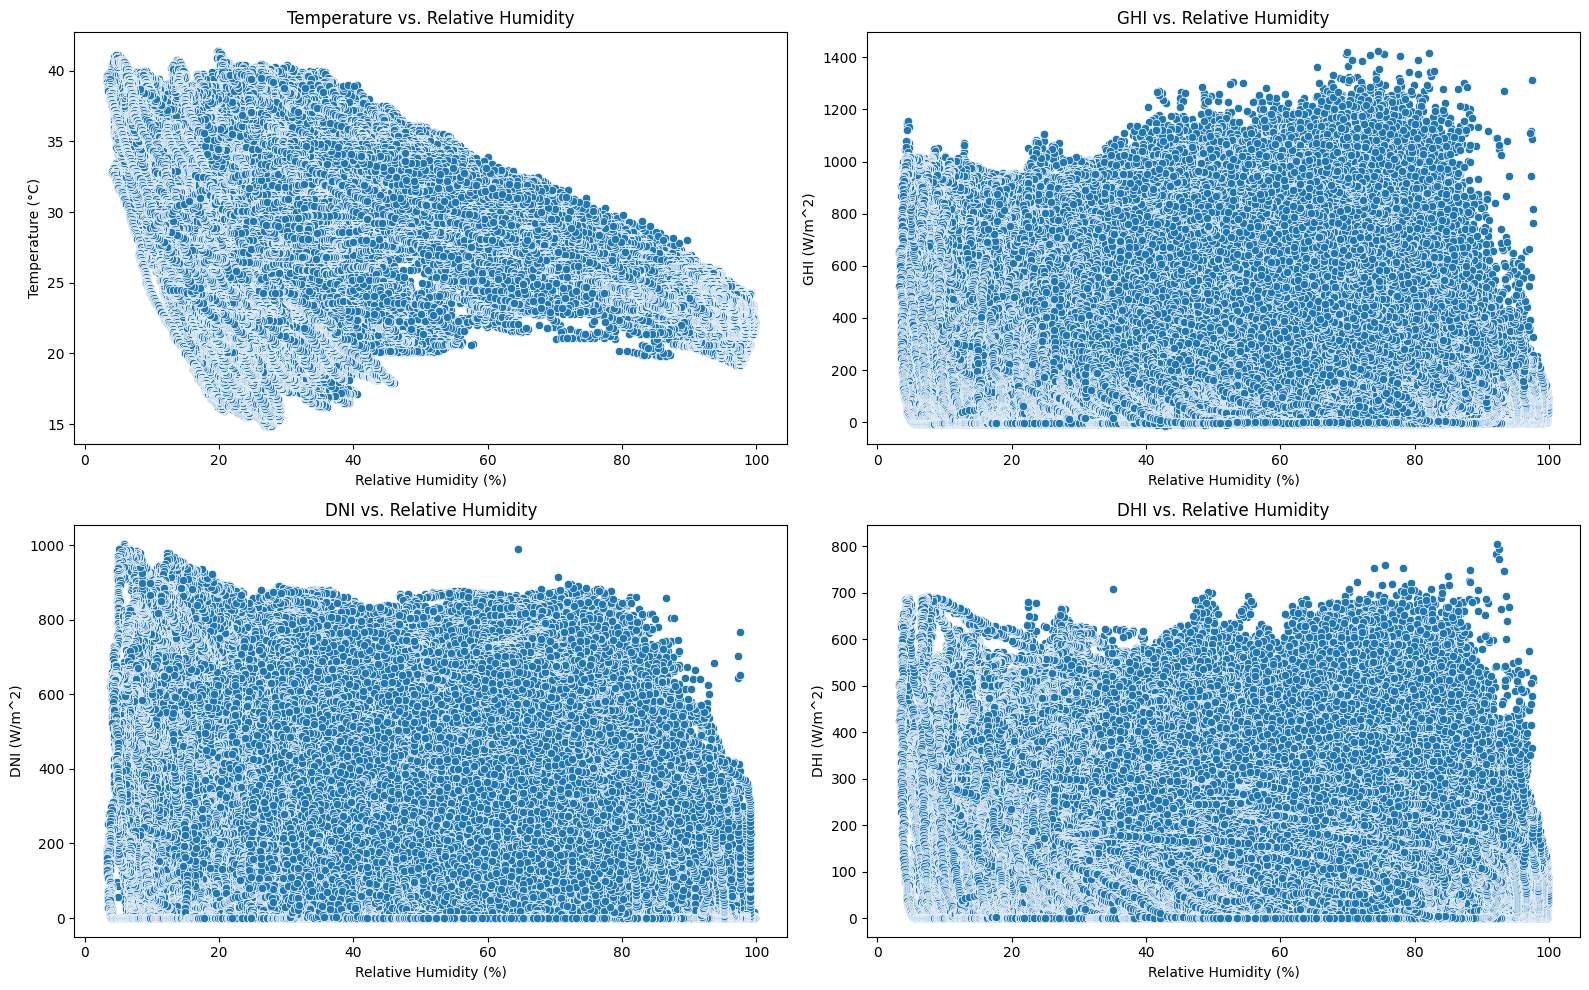

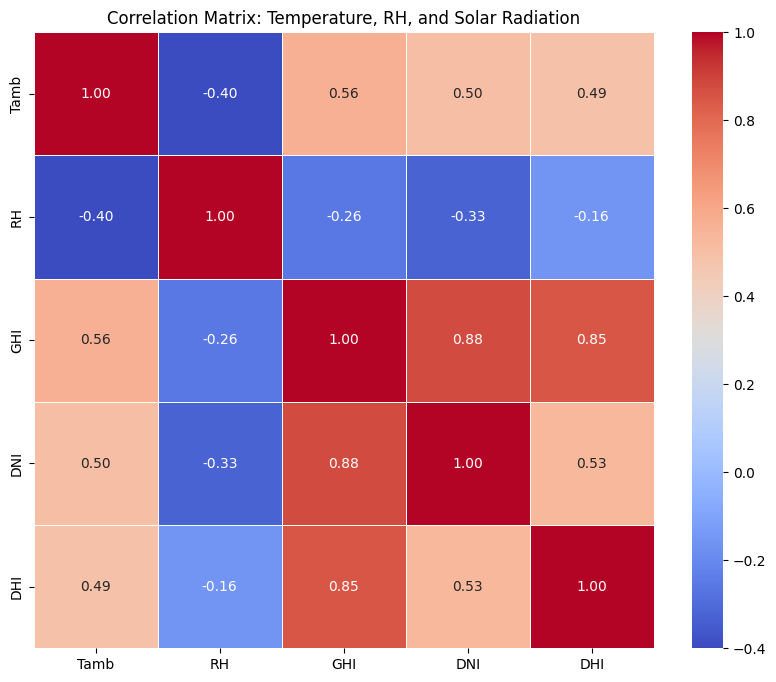

In [6]:
"""Temperature Analysis"""

# Scatter plot to visualize relationship
plot_temperature_vs_rh(togo_df, 'Tamb', 'RH', 'GHI', 'DNI', 'DHI')

# Correlation Analysis
correlation_analysis(togo_df, ['Tamb', 'RH', 'GHI', 'DNI', 'DHI'])



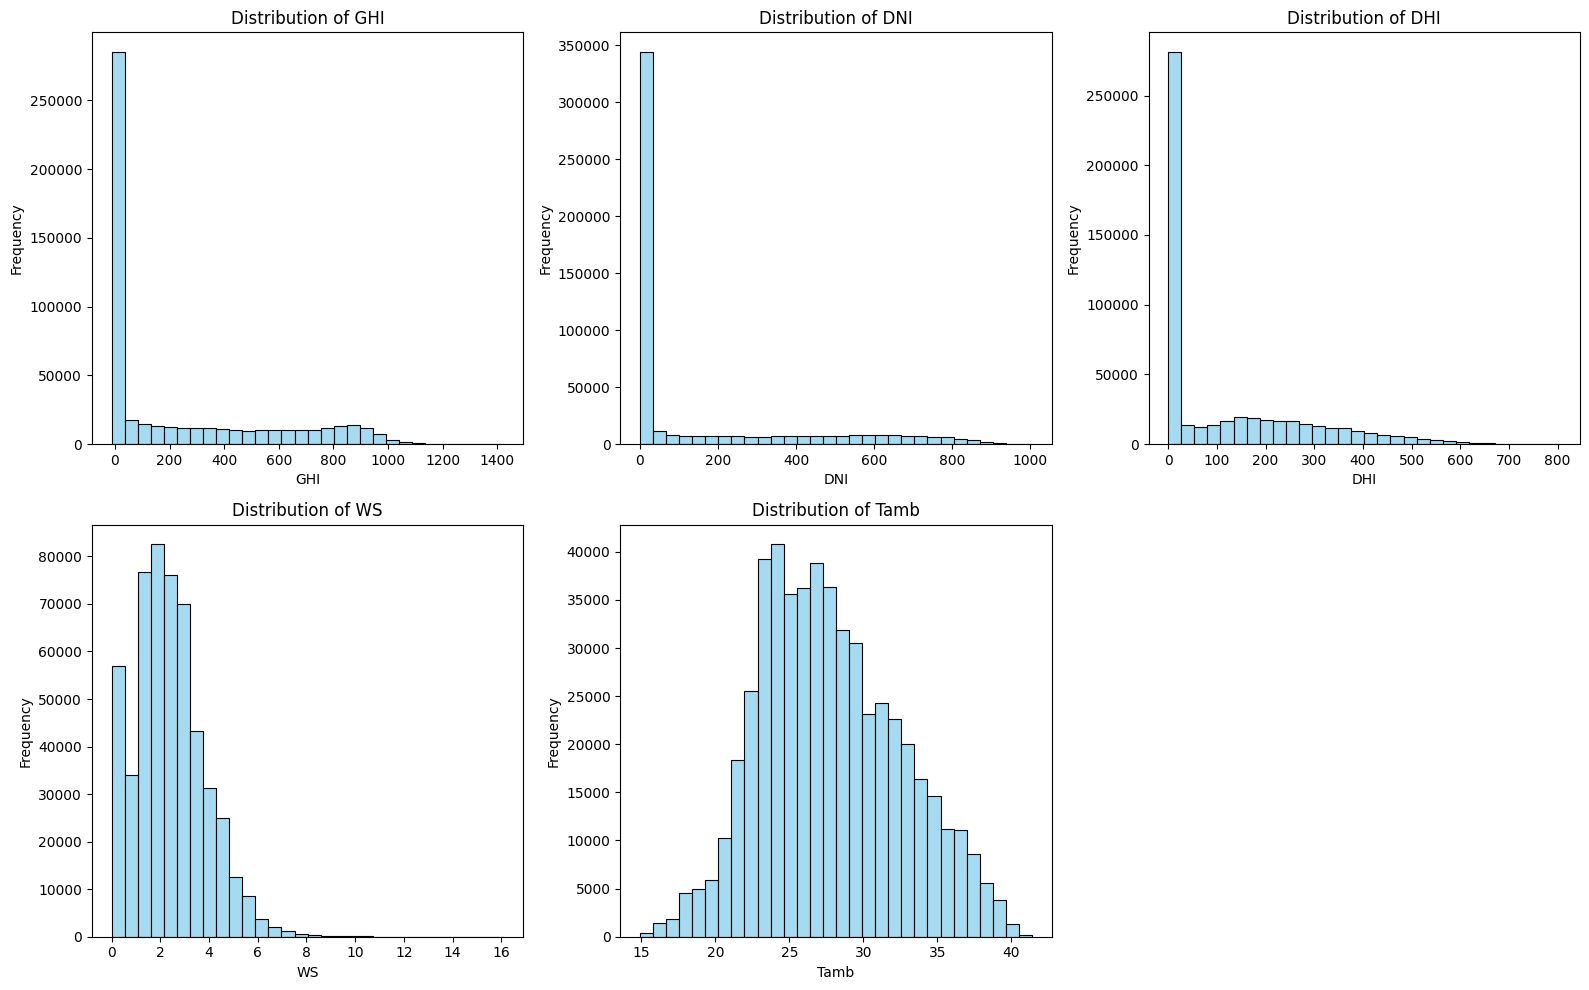

In [7]:
""" Histogram """

# List of variables to plot histograms for
columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Plot histograms for the togo dataset
plot_histograms(togo_df, columns)


In [8]:
""" Z-Score Analysis """

# List of variables to perform Z-score analysis on
columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']

# Calculate Z-scores and flag outliers for the togo dataset
togo_z_scores = calculate_z_scores(togo_df, columns)

# Display the flagged outliers
outliers = togo_df[togo_z_scores.filter(like='_outlier').any(axis=1)]
print("Outliers in the togo dataset:")
print(outliers)

""" Z-Scores: Each variable (e.g., GHI, DNI) will have a corresponding Z-score column (e.g., GHI_z_score). The Z-score represents the number of standard deviations a data point is from the mean.

Outliers: The function will create a boolean column (e.g., GHI_outlier) for each variable, where True indicates that the data point is an outlier (i.e., its absolute Z-score is greater than the threshold).  """


Outliers in the togo dataset:
                 Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
5411   2021-10-28 18:12:00   -1.0   0.0    0.0    0.0    0.0  29.3  62.4  6.9   
5413   2021-10-28 18:14:00   -0.8   0.0    0.0    0.0    0.0  28.6  63.7  7.1   
5425   2021-10-28 18:26:00   -1.3   0.0    0.0    0.0    0.0  27.3  65.0  6.9   
5429   2021-10-28 18:30:00   -1.3   0.0    0.0    0.0    0.0  27.1  65.2  6.9   
5432   2021-10-28 18:33:00   -1.4   0.0    0.0    0.0    0.0  26.9  65.6  6.9   
...                    ...    ...   ...    ...    ...    ...   ...   ...  ...   
510473 2022-10-14 11:54:00  709.5  63.7  629.8  703.1  694.9  30.2  66.6  3.5   
510474 2022-10-14 11:55:00  677.8  40.6  621.7  670.1  662.2  30.2  66.7  2.8   
510475 2022-10-14 11:56:00  659.5  29.7  614.9  651.0  643.4  30.3  66.1  4.1   
510476 2022-10-14 11:57:00  660.1  40.7  605.6  653.2  645.6  30.2  66.0  3.7   
510477 2022-10-14 11:58:00  655.8  50.2  591.0  647.5  639.9  30.2  66.2  3.4  

' Z-Scores: Each variable (e.g., GHI, DNI) will have a corresponding Z-score column (e.g., GHI_z_score). The Z-score represents the number of standard deviations a data point is from the mean.\n\nOutliers: The function will create a boolean column (e.g., GHI_outlier) for each variable, where True indicates that the data point is an outlier (i.e., its absolute Z-score is greater than the threshold).  '

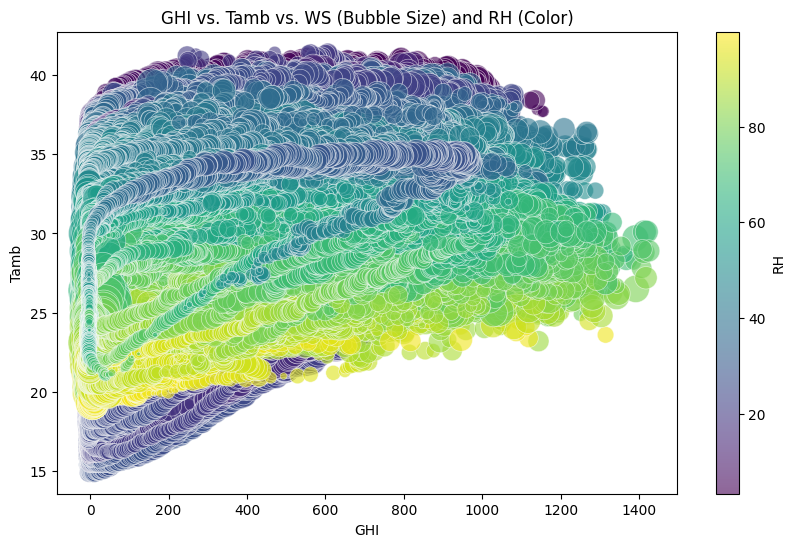

In [9]:
""" Bubble charts """

# Bubble chart of GHI vs. Tamb vs. WS, with bubble size representing RH (Relative Humidity)
plot_bubble_chart(
    df=togo_df, 
    x_column='GHI', 
    y_column='Tamb', 
    size_column='WS', 
    color_column='RH', 
    title='GHI vs. Tamb vs. WS (Bubble Size) and RH (Color)'
)


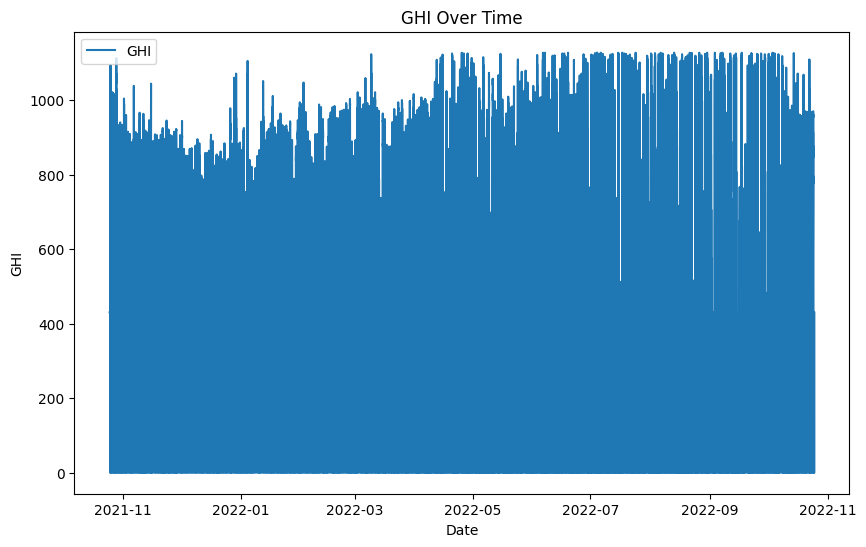

Timestamp    GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00  430.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00  430.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00  430.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00  430.3  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00  430.3  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [10]:
""" Data Cleaning """

# Handle missing values
togo_df_cleaned= handle_missing_values(togo_df)

# Handle anomalies (e.g., negative values)
togo_df_cleaned = handle_anomalies(togo_df, columns=['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust'])

# Handle outliers
togo_df_cleaned = handle_outliers(togo_df, columns=['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust'])

# Plotting GHI vs. Time
plt.figure(figsize=(10, 6))
plt.plot(togo_df_cleaned['Timestamp'], togo_df_cleaned['GHI'], label='GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title('GHI Over Time')
plt.legend()
plt.show()

# Display the first few rows of the cleaned DataFrame
togo_df_cleaned.head()